In [1]:
import numpy as np
import multiverse_python as mp

# Same Box Size

In [2]:
# cosmology_list = ["lcdm", "lcdm-C04"]
# cosmology_list = ["lcdm", "lcdm2", "lcdm3", "lcdm4"]
cosmology_list = ["lcdm", "cpl0", "cpl1"]

In [3]:
for cosmology in cosmology_list:
    snapNum = 150
    lmin = 7
    lmax = 14
    basePath = f"/data2/gilee/Multiverse/lmin{lmin:02d}/{cosmology.upper()}"
    
    globals()[f"data_{cosmology.replace('-', '_')}"] = mp.snapshot.loadDataAll(cosmology, basePath, snapNum)
    globals()[f"csfr_{cosmology.replace('-', '_')}"] = mp.processing.computeCSFR(globals()[f"data_{cosmology.replace('-', '_')}"])


[Load Data]

[Load Info]
  Found info: /data2/gilee/Multiverse/lmin07/LCDM/output_00150/info_00150.txt
  keys in info: dict_keys(['ncpu', 'ndim', 'levelmin', 'levelmax', 'ngridmax', 'nstep_coarse', 'boxlen', 'time', 'aexp', 'H0', 'omega_m', 'omega_l', 'omega_k', 'omega_b', 'unit_l', 'unit_d', 'unit_t', 'ordering type'])
  Found data: /data2/gilee/Multiverse/lmin07/LCDM/output_00150/part_00150.out00001
  Found data: /data2/gilee/Multiverse/lmin07/LCDM/output_00150/part_00150.out00002
  Found data: /data2/gilee/Multiverse/lmin07/LCDM/output_00150/part_00150.out00003
  Found data: /data2/gilee/Multiverse/lmin07/LCDM/output_00150/part_00150.out00004
  Found data: /data2/gilee/Multiverse/lmin07/LCDM/output_00150/part_00150.out00005
  Found data: /data2/gilee/Multiverse/lmin07/LCDM/output_00150/part_00150.out00006
  Found data: /data2/gilee/Multiverse/lmin07/LCDM/output_00150/part_00150.out00007
  Found data: /data2/gilee/Multiverse/lmin07/LCDM/output_00150/part_00150.out00008
  Found data:

  Found data: /data2/gilee/Multiverse/lmin07/CPL0/output_00150/part_00150.out00025
  Found data: /data2/gilee/Multiverse/lmin07/CPL0/output_00150/part_00150.out00026
  Found data: /data2/gilee/Multiverse/lmin07/CPL0/output_00150/part_00150.out00027
  Found data: /data2/gilee/Multiverse/lmin07/CPL0/output_00150/part_00150.out00028
  Found data: /data2/gilee/Multiverse/lmin07/CPL0/output_00150/part_00150.out00029
  Found data: /data2/gilee/Multiverse/lmin07/CPL0/output_00150/part_00150.out00030
  Found data: /data2/gilee/Multiverse/lmin07/CPL0/output_00150/part_00150.out00031
  Found data: /data2/gilee/Multiverse/lmin07/CPL0/output_00150/part_00150.out00032
  Total particle number = 2,849,515
  Found data: /data2/gilee/Multiverse/lmin07/CPL0/output_00150/part_00150.out00001
  Found data: /data2/gilee/Multiverse/lmin07/CPL0/output_00150/part_00150.out00002
  Found data: /data2/gilee/Multiverse/lmin07/CPL0/output_00150/part_00150.out00003
  Found data: /data2/gilee/Multiverse/lmin07/CPL0/o

  Found data: /data2/gilee/Multiverse/lmin07/CPL1/output_00150/part_00150.out00023
  Found data: /data2/gilee/Multiverse/lmin07/CPL1/output_00150/part_00150.out00024
  Found data: /data2/gilee/Multiverse/lmin07/CPL1/output_00150/part_00150.out00025
  Found data: /data2/gilee/Multiverse/lmin07/CPL1/output_00150/part_00150.out00026
  Found data: /data2/gilee/Multiverse/lmin07/CPL1/output_00150/part_00150.out00027
  Found data: /data2/gilee/Multiverse/lmin07/CPL1/output_00150/part_00150.out00028
  Found data: /data2/gilee/Multiverse/lmin07/CPL1/output_00150/part_00150.out00029
  Found data: /data2/gilee/Multiverse/lmin07/CPL1/output_00150/part_00150.out00030
  Found data: /data2/gilee/Multiverse/lmin07/CPL1/output_00150/part_00150.out00031
  Found data: /data2/gilee/Multiverse/lmin07/CPL1/output_00150/part_00150.out00032
  Star particle number = 601,593
  DM particle number = 2,097,152
  BH particle number = 132,355
  Total particle number = 2,831,100 (check)

[Load Time Table]
  cosmolog

In [4]:
def get_csfr_behroozi(file_path):
    
    import pandas as pd
    
    """
    Plots the cosmic star formation rate density from Behroozi et al. (2013).
    """
    # Read the data
    behroozi = pd.read_csv(file_path, 
                           names=['z', 'log10_csfr', 'err+', 'err-'], 
                           skiprows=3, delim_whitespace=True)
    
    return behroozi

In [5]:
behroozi = get_csfr_behroozi("/md/gilee/cosmos-in-us/Multiverse-utils/notebooks/read_particle/behroozi/behroozi-2013-data-compilation/csfrs_new.dat")
a_refine = [0.8, 0.4, 0.2, 0.1, 0.05, 0.025, 0.0125]
a_refine = np.array(a_refine)
z_refine = 1/a_refine - 1

<IPython.core.display.Javascript object>


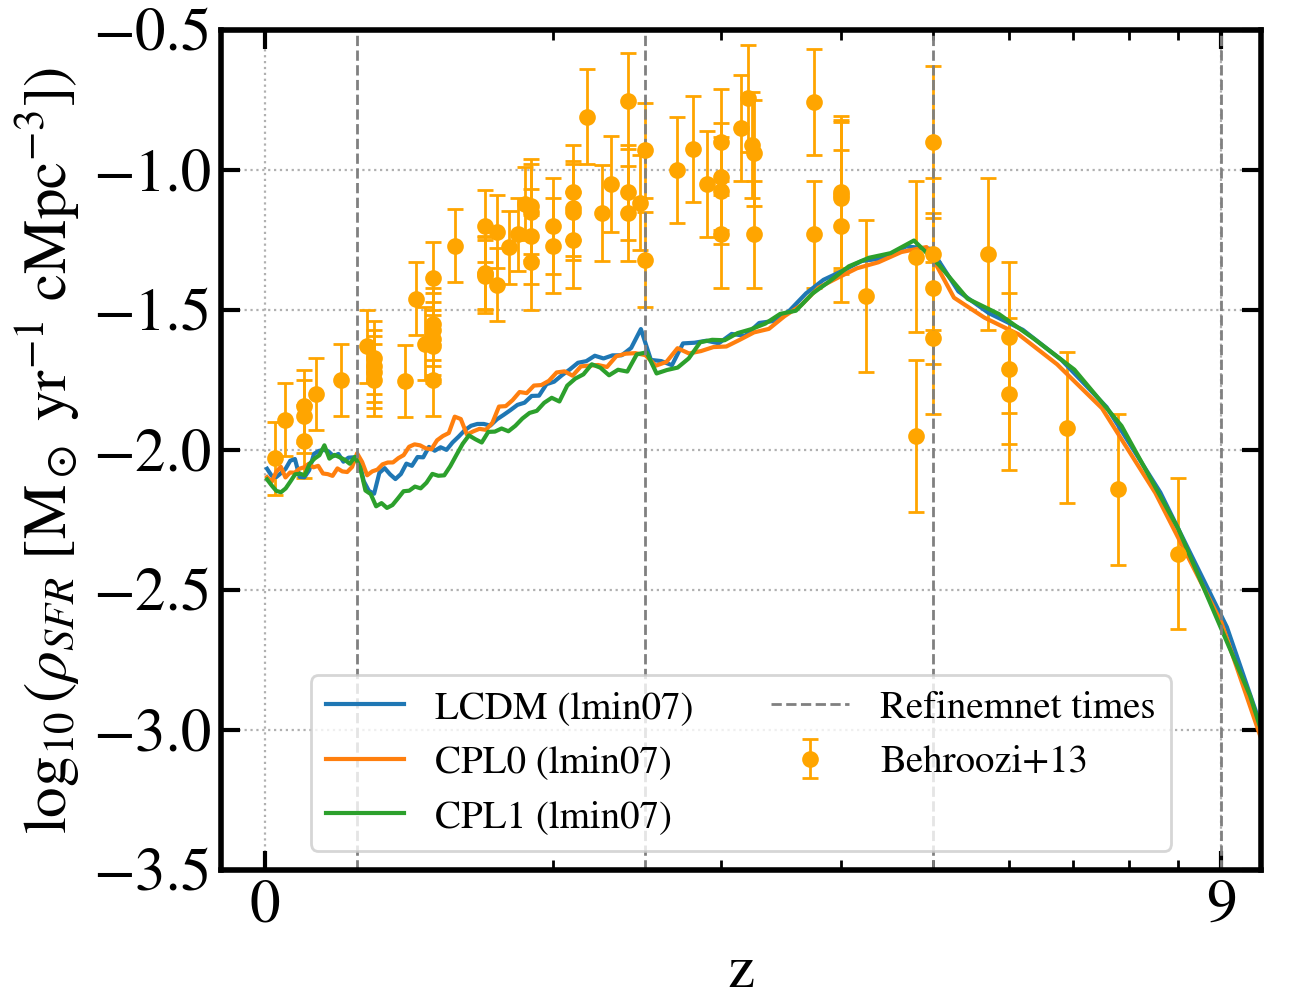

/tmp/ipykernel_2442974/2471272038.py:18: RuntimeWarning: divide by zero encountered in log10
  np.log10(globals()[f"csfr_{cosmology.replace('-', '_')}"][1]), label=f"{cosmology.upper()} (lmin{lmin:02d})")


In [6]:
plt.figure(figsize=(6.5, 5))

# Observational results
plt.errorbar(
    behroozi['z']+1,
    behroozi['log10_csfr'],
    yerr=[behroozi['err-'], behroozi['err+']],
    fmt='o', c='orange',
    capsize=3,
    elinewidth=1,
    ms=5,
    label="Behroozi+13"
)

# # Simulation results
for cosmology in cosmology_list:
    plt.plot(globals()[f"csfr_{cosmology.replace('-', '_')}"][0] + 1,
             np.log10(globals()[f"csfr_{cosmology.replace('-', '_')}"][1]), label=f"{cosmology.upper()} (lmin{lmin:02d})")


# Refinement times
plt.axvline([0], ls="--", c='gray', lw=1, label="Refinemnet times")
for z_ref in z_refine:
    plt.axvline(z_ref+1, ls="--", c='gray', lw=1)

plt.xscale('log')
plt.xlim(0.9, 11)
plt.ylim(-3.5, -0.5)

# Set custom ticks and labels
ticks = [1, 10]  # Positions for 10^0 and 10^1
labels = ['0', '9']  # Custom labels
plt.xticks(ticks, labels)

plt.legend(fontsize=14, ncols=2, frameon=True, loc="lower center")

plt.grid(ls=":")
plt.xlabel("z")
plt.ylabel(r"$\log_{10}(\rho_{SFR}$ [M$_\odot$ yr$^{-1}$ cMpc$^{-3}$])")
plt.subplots_adjust(bottom=0.13, left=0.17, top=0.97, right=0.97)

# Different Box Sizes

In [7]:
data_lcdm_l07 = mp.snapshot.loadDataAll(cosmology="lcdm",
                                        basePath=f"/data2/gilee/Multiverse/lmin07/LCDM", 
                                        snapNum=150)
data_lcdm_l08 = mp.snapshot.loadDataAll(cosmology="lcdm",
                                        basePath=f"/data2/gilee/Multiverse/lmin08/LCDM", 
                                        snapNum=150)
data_lcdm_l09 = mp.snapshot.loadDataAll(cosmology="lcdm",
                                        basePath=f"/data2/gilee/Multiverse/lmin09/LCDM", 
                                        snapNum=50)


[Load Data]

[Load Info]
  Found info: /data2/gilee/Multiverse/lmin07/LCDM/output_00150/info_00150.txt
  keys in info: dict_keys(['ncpu', 'ndim', 'levelmin', 'levelmax', 'ngridmax', 'nstep_coarse', 'boxlen', 'time', 'aexp', 'H0', 'omega_m', 'omega_l', 'omega_k', 'omega_b', 'unit_l', 'unit_d', 'unit_t', 'ordering type'])
  Found data: /data2/gilee/Multiverse/lmin07/LCDM/output_00150/part_00150.out00001
  Found data: /data2/gilee/Multiverse/lmin07/LCDM/output_00150/part_00150.out00002
  Found data: /data2/gilee/Multiverse/lmin07/LCDM/output_00150/part_00150.out00003
  Found data: /data2/gilee/Multiverse/lmin07/LCDM/output_00150/part_00150.out00004
  Found data: /data2/gilee/Multiverse/lmin07/LCDM/output_00150/part_00150.out00005
  Found data: /data2/gilee/Multiverse/lmin07/LCDM/output_00150/part_00150.out00006
  Found data: /data2/gilee/Multiverse/lmin07/LCDM/output_00150/part_00150.out00007
  Found data: /data2/gilee/Multiverse/lmin07/LCDM/output_00150/part_00150.out00008
  Found data:

  Found data: /data2/gilee/Multiverse/lmin08/LCDM/output_00150/part_00150.out00026
  Found data: /data2/gilee/Multiverse/lmin08/LCDM/output_00150/part_00150.out00027
  Found data: /data2/gilee/Multiverse/lmin08/LCDM/output_00150/part_00150.out00028
  Found data: /data2/gilee/Multiverse/lmin08/LCDM/output_00150/part_00150.out00029
  Found data: /data2/gilee/Multiverse/lmin08/LCDM/output_00150/part_00150.out00030
  Found data: /data2/gilee/Multiverse/lmin08/LCDM/output_00150/part_00150.out00031
  Found data: /data2/gilee/Multiverse/lmin08/LCDM/output_00150/part_00150.out00032
  Total particle number = 23,455,512
  Found data: /data2/gilee/Multiverse/lmin08/LCDM/output_00150/part_00150.out00001
  Found data: /data2/gilee/Multiverse/lmin08/LCDM/output_00150/part_00150.out00002
  Found data: /data2/gilee/Multiverse/lmin08/LCDM/output_00150/part_00150.out00003
  Found data: /data2/gilee/Multiverse/lmin08/LCDM/output_00150/part_00150.out00004
  Found data: /data2/gilee/Multiverse/lmin08/LCDM/

  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00055
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00056
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00057
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00058
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00059
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00060
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00061
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00062
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00063
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00064
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00065
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00066
  Fo

  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00154
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00155
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00156
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00157
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00158
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00159
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00160
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00161
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00162
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00163
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00164
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00165
  Fo

  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00253
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00254
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00255
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00256
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00257
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00258
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00259
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00260
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00261
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00262
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00263
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00264
  Fo

  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00353
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00354
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00355
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00356
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00357
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00358
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00359
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00360
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00361
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00362
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00363
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00364
  Fo

  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00452
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00453
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00454
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00455
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00456
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00457
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00458
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00459
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00460
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00461
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00462
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00463
  Fo

  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00558
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00559
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00560
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00561
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00562
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00563
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00564
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00565
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00566
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00567
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00568
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00569
  Fo

  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00062
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00063
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00064
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00065
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00066
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00067
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00068
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00069
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00070
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00071
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00072
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00073
  Fo

  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00164
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00165
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00166
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00167
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00168
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00169
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00170
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00171
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00172
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00173
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00174
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00175
  Fo

  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00270
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00271
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00272
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00273
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00274
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00275
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00276
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00277
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00278
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00279
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00280
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00281
  Fo

  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00370
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00371
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00372
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00373
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00374
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00375
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00376
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00377
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00378
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00379
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00380
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00381
  Fo

  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00473
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00474
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00475
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00476
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00477
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00478
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00479
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00480
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00481
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00482
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00483
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00484
  Fo

  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00574
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00575
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00576
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00577
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00578
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00579
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00580
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00581
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00582
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00583
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00584
  Found data: /data2/gilee/Multiverse/lmin09/LCDM/output_00050/part_00050.out00585
  Fo

In [8]:
csfr_lcdm_l07 = mp.processing.computeCSFR(data_lcdm_l07)
csfr_lcdm_l08 = mp.processing.computeCSFR(data_lcdm_l08)
csfr_lcdm_l09 = mp.processing.computeCSFR(data_lcdm_l09)


[Load Time Table]
  cosmology: lcdm
  (w0, wa) = (-1.0, 0.0)
  Found time table: /md/gilee/cosmos-in-us/Multiverse-utils/notebooks/friedmann/time_table_cpl-1.0+0.0.csv

Returns z, csfr

[Load Time Table]
  cosmology: lcdm
  (w0, wa) = (-1.0, 0.0)
  Found time table: /md/gilee/cosmos-in-us/Multiverse-utils/notebooks/friedmann/time_table_cpl-1.0+0.0.csv

Returns z, csfr

[Load Time Table]
  cosmology: lcdm
  (w0, wa) = (-1.0, 0.0)
  Found time table: /md/gilee/cosmos-in-us/Multiverse-utils/notebooks/friedmann/time_table_cpl-1.0+0.0.csv

Returns z, csfr


<IPython.core.display.Javascript object>


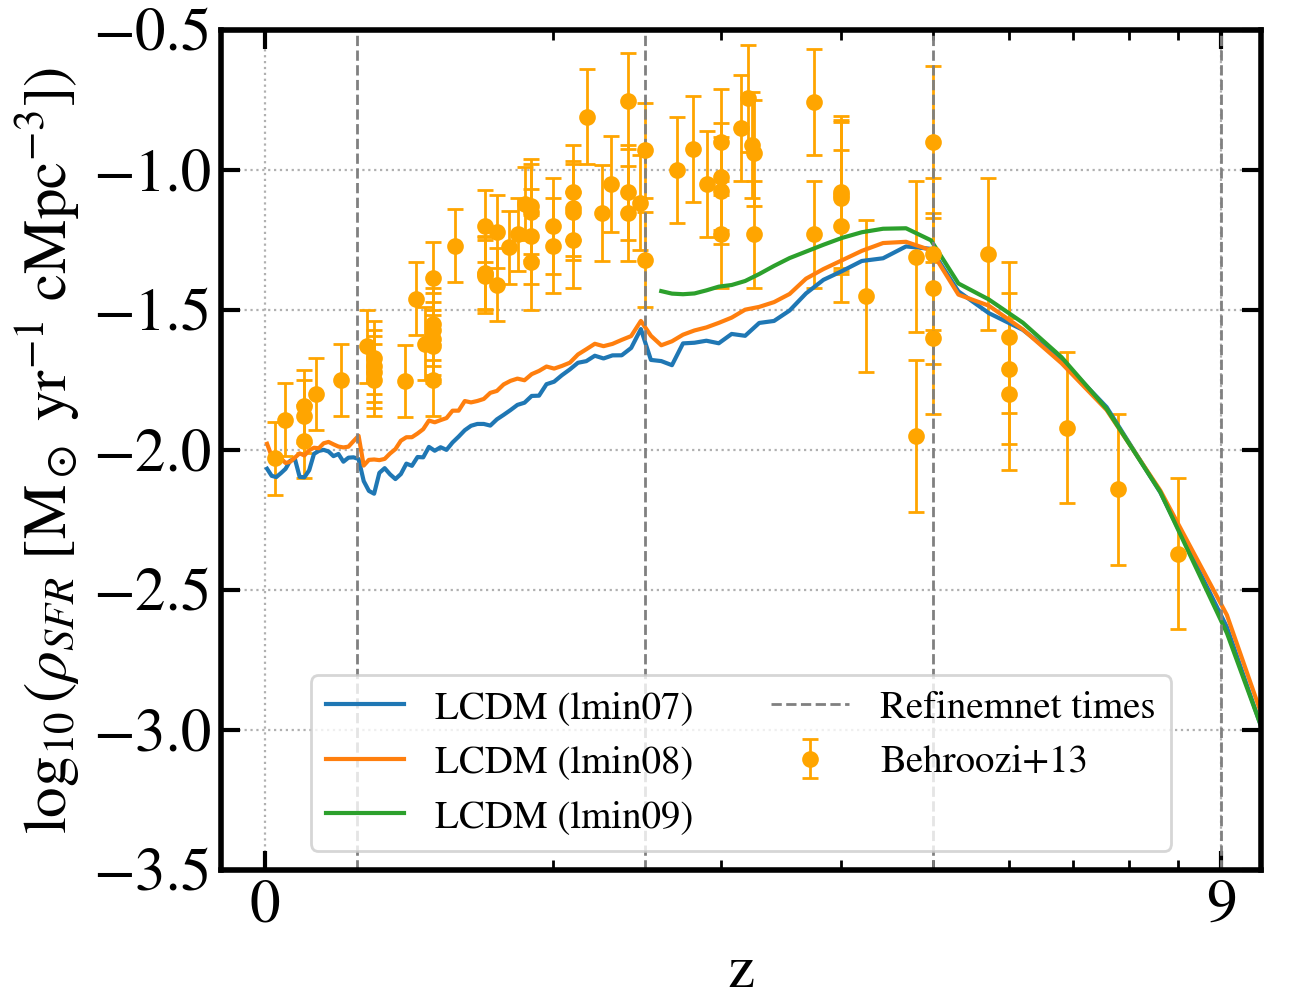

/tmp/ipykernel_2442974/2926357197.py:16: RuntimeWarning: divide by zero encountered in log10
  plt.plot(csfr_lcdm_l07[0]+1, np.log10(csfr_lcdm_l07[1]), label=f"LCDM (lmin07)")
/tmp/ipykernel_2442974/2926357197.py:17: RuntimeWarning: divide by zero encountered in log10
  plt.plot(csfr_lcdm_l08[0]+1, np.log10(csfr_lcdm_l08[1]), label=f"LCDM (lmin08)")
/tmp/ipykernel_2442974/2926357197.py:18: RuntimeWarning: divide by zero encountered in log10
  plt.plot(csfr_lcdm_l09[0]+1, np.log10(csfr_lcdm_l09[1]), label=f"LCDM (lmin09)")


In [9]:
plt.figure(figsize=(6.5, 5))

# Observational results
plt.errorbar(
    behroozi['z']+1,
    behroozi['log10_csfr'],
    yerr=[behroozi['err-'], behroozi['err+']],
    fmt='o', c='orange',
    capsize=3,
    elinewidth=1,
    ms=5,
    label="Behroozi+13"
)

# # Simulation results
plt.plot(csfr_lcdm_l07[0]+1, np.log10(csfr_lcdm_l07[1]), label=f"LCDM (lmin07)")
plt.plot(csfr_lcdm_l08[0]+1, np.log10(csfr_lcdm_l08[1]), label=f"LCDM (lmin08)")
plt.plot(csfr_lcdm_l09[0]+1, np.log10(csfr_lcdm_l09[1]), label=f"LCDM (lmin09)")

# Refinement times
plt.axvline([0], ls="--", c='gray', lw=1, label="Refinemnet times")
for z_ref in z_refine:
    plt.axvline(z_ref+1, ls="--", c='gray', lw=1)

plt.xscale('log')
plt.xlim(0.9, 11)
plt.ylim(-3.5, -0.5)

# Set custom ticks and labels
ticks = [1, 10]  # Positions for 10^0 and 10^1
labels = ['0', '9']  # Custom labels
plt.xticks(ticks, labels)

plt.legend(fontsize=14, ncols=2, frameon=True, loc="lower center")

plt.grid(ls=":")
plt.xlabel("z")
plt.ylabel(r"$\log_{10}(\rho_{SFR}$ [M$_\odot$ yr$^{-1}$ cMpc$^{-3}$])")
plt.subplots_adjust(bottom=0.13, left=0.17, top=0.97, right=0.97)